In [1]:
!pip install deap
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 3.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


**Dataset:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

**Algorithm:** SVM 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Read the shared file
file_path = '/content/drive/MyDrive/Final assignment/Dataset/mushroom/mushrooms.csv'

Mounted at /content/drive


In [3]:
import numpy as np
from pandas import read_csv


data = read_csv(file_path)
X = data.iloc[:, 1:23]
y = data.iloc[:, 0:1]

print(data.shape)

X

(8124, 23)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

encoder = ce.OrdinalEncoder()
X = encoder.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,2,1,1,...,1,1,1,1,1,1,1,2,2,2
2,2,1,3,1,3,1,1,2,2,1,...,1,1,1,1,1,1,1,2,2,3
3,1,2,3,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,4,2,4,1,2,2,1,2,...,1,1,1,1,1,1,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,1,1,2,4,2,1,2,11,1,...,1,7,8,1,3,1,1,9,6,7
8120,1,1,1,2,4,2,1,2,11,1,...,1,7,8,1,2,1,1,9,4,7
8121,4,1,1,2,4,2,1,2,2,1,...,1,7,8,1,3,1,1,9,6,7
8122,5,2,1,2,7,1,1,1,9,2,...,4,1,1,1,1,1,2,5,4,7


In [4]:
y

,class
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [ ]:
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
svm_classifier = svm.SVC()
cv_results = model_selection.cross_val_score(svm_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[SVM] mean: ',cv_results.mean())

[SVM] mean:  0.998922602820908


In [ ]:
dt_classifier = DecisionTreeClassifier()
cv_results = model_selection.cross_val_score(dt_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[DT] mean: ',cv_results.mean())

[DT] mean:  1.0


In [ ]:
knn_classifier = KNeighborsClassifier()
cv_results = model_selection.cross_val_score(knn_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[KNN] mean: ',cv_results.mean())

[KNN] mean:  0.9995382244873771


In [ ]:
gb_classifier = GradientBoostingClassifier()
cv_results = model_selection.cross_val_score(gb_classifier,
                                                 X_train,
                                                 y_train,
                                                 cv=kfold,
                                                 scoring='accuracy')

print('[GB] mean: ',cv_results.mean())

[GB] mean:  1.0


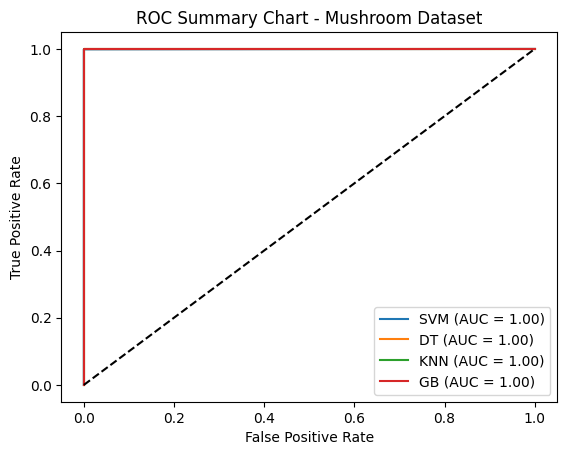

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

svm_classifier.fit(X_train,y_train)
dt_classifier.fit(X_train,y_train)
knn_classifier.fit(X_train,y_train)
gb_classifier.fit(X_train,y_train)

# Now you have the true labels and predicted probabilities/scores
y_true = y_test  # True labels from the test data


# Make predictions using your trained model
y_pred1 = svm_classifier.predict(X_test) 
fpr1, tpr1, thresholds1 = roc_curve(y_true, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

# Make predictions using your trained model
y_pred2 = dt_classifier.predict(X_test) 
fpr2, tpr2, thresholds2 = roc_curve(y_true, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

# Make predictions using your trained model
y_pred3 = knn_classifier.predict(X_test) 
fpr3, tpr3, thresholds3 = roc_curve(y_true, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

# Make predictions using your trained model
y_pred4 = gb_classifier.predict(X_test) 
fpr4, tpr4, thresholds3 = roc_curve(y_true, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

# Plotting the ROC curve
plt.plot(fpr1, tpr1, label='SVM (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='DT (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='KNN (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='GB (AUC = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Summary Chart - Mushroom Dataset')
plt.legend(loc='lower right')
plt.show()
